# Time series of radiation biases from different models
Now we want to use the function that produces us time series of the model data including the individual CERES years to show us the variability

In [1]:
from aqua import Reader, catalogue, inspect_catalogue
import sys
import os
import dask
dask.config.config.get('distributed').get('dashboard').update({'link':'{JUPYTERHUB_SERVICE_PREFIX}/proxy/{port}/status'})
%env PATH={os.environ["PATH"]}:{sys.exec_prefix}/bin/

env: PATH=/sw/spack-levante/texlive-live2021-l5o6sw/bin/x86_64-linux:/sw/spack-levante/texlive-live2021-l5o6sw/bin:/sw/spack-levante/git-lfs-2.11.0-oihcwo/bin:/sw/spack-levante/git-2.31.1-25ve7r/bin:/sw/spack-levante/jupyterhub/jupyterhub/bin:/sw/spack-workplace/spack/bin:/usr/share/Modules/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/home/b/b382257/.conda/envs/aqua/bin/


In [2]:
parent_directory = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_directory)
from functions import process_ceres_data, process_model_data, process_era5_data, process_ceres_sfc_data
from functions import gregory_plot, barplot_model_data, plot_model_comparison_timeseries, plot_bias, plot_maps

### Loading the data we need for the analysis
First we retrieve and process (-> creating fldmeans) some data from the CERES and model output catalogues using the respective functions

In [3]:
TOA_ifs_4km_gm, reader_ifs_4km, data_ifs_4km, TOA_ifs_4km, TOA_ifs_4km_r360x180 = process_model_data(model =  'IFS' , exp = 'tco2559-ng5-cycle3' , source = 'lra-r100-monthly')

In [4]:
TOA_ifs_9km_gm, reader_ifs_9km, data_ifs_9km, TOA_ifs_9km, TOA_ifs_9km_r360x180 = process_model_data(model =  'IFS' , exp = 'tco1279-orca025-cycle3' , source = 'lra-r100-monthly')

In [5]:
TOA_icon_gm, reader_icon, data_icon, TOA_icon, TOA_icon_r360x180 = process_model_data(model =  'ICON' , exp = 'ngc3028' , source = 'lra-r100-monthly')

/home/b/b382257/.conda/envs/aqua/lib/python3.10/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [6]:
# Call the method to retrieve CERES data
TOA_ceres_clim_gm, TOA_ceres_ebaf_gm, TOA_ceres_diff_samples_gm, reader_ceres_toa, TOA_ceres_clim, TOA_ceres_diff_samples =process_ceres_data(exp = "ebaf-toa41", source = "monthly", TOA_icon_gm=TOA_icon_gm)

In [7]:
data_era5, reader_era5 = process_era5_data(exp = "era5" , source = "monthly")

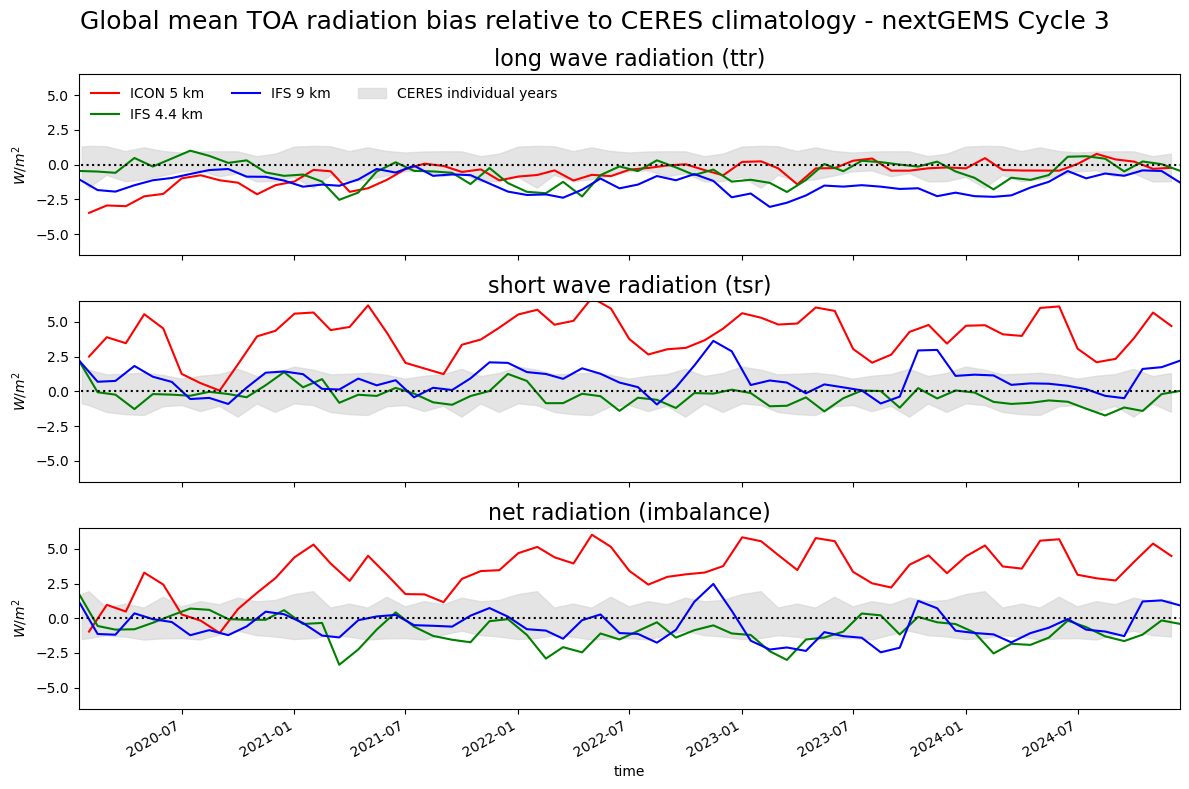

Data has been saved to ./output/data/.
Plot has been saved to ./output/figs/.


In [8]:
#TOA_ceres_clim_gm, TOA_ceres_ebaf_gm, TOA_ceres_diff_samples_gm, _ = radiation_diag.process_ceres_data(exp="ebaf-toa41", source="monthly")
models = [TOA_icon_gm.squeeze(), TOA_ifs_4km_gm.squeeze(), TOA_ifs_9km_gm.squeeze()]
linelabels = ['ICON 5 km', 'IFS 4.4 km', 'IFS 9 km']
plot_model_comparison_timeseries(models, linelabels, TOA_ceres_diff_samples_gm, TOA_ceres_clim_gm)